Trong notebook này, bạn sẽ học Hồi quy Logistic (Logistic Regression), sau đó, bạn sẽ giúp một công ty viễn thông tạo ra mô hình dự đoán khi nào khách hàng của họ rời đi đến với đối thủ cạnh tranh để họ có thể thực hiện một số hành động nhằm giữ chân khách hàng.

<h1>Mục lục</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">Về tập dữ liệu</a></li>
        <li><a href="#preprocessing">Tiền xử lý (pre-processing) và chọn dữ liệu</a></li>
        <li><a href="#modeling">Mô hình hóa (Hồi quy Logistic với Scikit-learn)</a></li>
        <li><a href="#evaluation">Đánh giá</a></li>
        <li><a href="#practice">Thực hành</a></li>
    </ol>
</div>
<br>
<hr>


<a id="ref1"></a>

## Sự khác biệt giữa Hồi quy tuyến tính và Hồi quy Logistic là gì?

Mặc dù Hồi quy tuyến tính phù hợp để ước tính các giá trị liên tục (ví dụ: ước tính giá nhà), nó không phải là công cụ tốt nhất để dự đoán lớp (class) của một điểm dữ liệu Để ước tính lớp của một điểm dữ liệu, chúng ta cần một số hướng dẫn về <b>lớp có thể xảy ra nhất </b> cho điểm dữ liệu đó. Vì vậy, chúng ta sử dụng <b>Hồi quy logistic</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Nhớ lại hồi quy tuyến tính:</strong></font>
<br>
<br>
    Như bạn đã biết, <b>hồi quy tuyến tính</b> tìm một hàm liên quan đến một biến phụ thuộc liên tục <b>y</b>, với một số bộ dự đoán (predictors ) (các biến độc lập $x_1$, $x_2$, ...). Ví dụ, hồi quy tuyến tính đơn giản giả định một hàm có dạng:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
và tìm giá trị của các tham số $\theta_0, \theta_1, \theta_2$, ..., trong đó số hạng $\theta_0$ là "hệ số chặn". Nó thường được hiển thị như sau:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Hồi quy logistic là một biến thể của Hồi quy tuyến tính, hữu ích khi biến phụ thuộc quan sát <b>y</b> có tính phân loại. Nó tạo ra một công thức dự đoán xác suất của nhãn lớp là một hàm của các biến độc lập.

Hồi quy logistic phù hợp với một đường cong hình chữ s đặc biệt bằng cách lấy hồi quy tuyến tính và chuyển ước lượng số thành xác suất với hàm sigmoid 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Hoặc:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

Trong phương trình này, ${\theta^TX}$  là kết quả hồi quy (tổng của các biến có trọng số bởi các hệ số), `exp` là hàm mũ và $\sigma(\theta^TX)$ là sigmoid hoặc [hàm logistic](http://en.wikipedia.org/wiki/Logistic_function?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), còn được gọi là đường cong logistic. Nó có hình "S" thông thường (đường cong sigmoid).

Vì vậy, nói ngắn gọn, Hồi quy Logistic chuyển input thông qua logistic/sigmoid nhưng sau đó xử lý kết quả như xác suất:

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

Mục tiêu của thuật toán **Hồi quy Logistic** là tìm các tham số tốt nhất θ cho $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$ theo cách sao cho mô hình dự đoán tốt nhất các lớp của từng trường hợp.


### Customer Churn (Tỉ lệ khách hàng rời đi) với Hồi quy Logistic

Có một công ty viễn thông lo ngại về lượng khách hàng rời bỏ công việc kinh doanh viễn thông của họ và đầu nhập các đối thủ cạnh tranh bằng cáp. Họ cần hiểu ai là người ra đi. Hãy đóng vai là một nhà phân tích tại công ty này và bạn cần tìm hiểu xem ai sẽ rời đi và tại sao.


In [1]:
#!pip install scikit-learn==0.23.1

Trước tiên hãy import các thư viện cần thiết:


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="about_dataset">Về tập dữ liệu</h2>
Chúng ta sẽ sử dụng một tập dữ liệu viễn thông để dự đoán tình trạng khách hàng rời đi. Đây là tập dữ liệu khách hàng lịch sử, trong đó mỗi hàng đại diện cho một khách hàng. Dữ liệu tương đối dễ hiểu và bạn có thể khám phá thông tin chi tiết có thể sử dụng ngay lập tức. Thông thường, việc giữ khách hàng sẽ ít tốn kém hơn là tìm các khách hàng mới, vì vậy trọng tâm của phân tích này là dự đoán những khách hàng sẽ ở lại với công ty.

Tập dữ liệu này cung cấp thông tin để giúp bạn dự đoán hành vi nào sẽ giúp bạn giữ chân khách hàng. Bạn có thể phân tích tất cả dữ liệu khách hàng có liên quan và phát triển các chương trình tập trung giữ chân khách hàng.

Tập dữ liệu bao gồm thông tin về:

- Những khách hàng đã rời đi trong tháng trước - cột Churn
- Các dịch vụ mà mỗi khách hàng đã đăng ký - điện thoại, nhiều đường truyền, internet, bảo mật trực tuyến, sao lưu trực tuyến, bảo vệ thiết bị, hỗ trợ công nghệ, truyền trực tuyến TV và phim
- Thông tin tài khoản khách hàng - họ đã là khách hàng trong bao lâu, hợp đồng, phương thức thanh toán, thanh toán không cần giấy tờ, các khoản phí hàng tháng và tổng các khoản phí
- Thông tin nhân khẩu học về khách hàng - giới tính, độ tuổi và liệu họ đã kết hôn và có người phụ thuộc


### Tải dữ liệu từ tệp CSV


In [3]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

<h2 id="preprocessing">Tiền xử lý và chọn dữ liệu</h2>


Hãy chọn một số thuộc tính cho mô hình. Ngoài ra, chúng ta thay đổi kiểu dữ liệu đích thành số nguyên vì nó là một yêu cầu của thuật toán skitlearn:


In [5]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Thực hành

Tổng cộng có bao nhiêu hàng và cột trong tập dữ liệu này? Tên của các cột là gì?


In [6]:
# Nhập code của bạn ở đây
churn_df.shape

(200, 10)

<details><summary>Click vào đây để xem lời giải</summary>

```python
churn_df.shape

```

</details>


Hãy xác định X và y cho tập dữ liệu:


In [7]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [8]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Ngoài ra, chúng ta chuẩn hóa tập dữ liệu:


In [9]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Tập dữ liệu train/set


Được rồi, chúng ta chia tập dữ liệu của mình thành train set và test set:


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


<h2 id="modeling">Mô hình hóa (Hồi quy Logistic với Scikit-learn)</h2>


Hãy xây dựng mô hình bằng **LogisticRegression** từ gói Scikit-learning. Hàm này thực hiện hồi quy logistic và có thể sử dụng các trình tối ưu hóa số khác nhau để tìm các tham số, bao gồm các bộ giải 'newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’. Bạn có thể tìm thấy nhiều thông tin về ưu nhược điểm của các trình tối ưu hóa này trên internet.

Phiên bản của Hồi quy Logistic trong Scikit-learning hỗ trợ điều chuẩn (regularization). Điều chuẩn là một kỹ thuật được sử dụng để giải quyết bài toán quá khớp (overfitting) trong các mô hình học máy.
Tham số **C** cho biết **nghịch đảo của cường độ điều chuẩn** phải là một số thực dương. Giá trị nhỏ hơn xác định điều chuẩn mạnh hơn.
Bây giờ, hãy fit mô hình với train set:


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Bây giờ chúng ta có thể dự đoán bằng  test set:


In [12]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

**predict_proba**  trả về ước lượng cho tất cả các lớp, được sắp xếp theo nhãn của các lớp. Vì vậy, cột đầu tiên là xác suất của lớp 0, P (Y = 0|X) và cột thứ hai là xác suất của lớp 1, P (Y = 1|X):


In [13]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

<h2 id="evaluation">Đánh giá</h2>


### jaccard index (giải thuật jaccard)

Hãy thử jaccard index để đánh giá độ chính xác. Chúng ta có thể xác định jaccard là kích thước của giao điểm chia cho kích thước hợp của hai tập nhãn. Nếu toàn bộ tập các nhãn được dự đoán cho một mẫu hoàn toàn khớp với tập các nhãn thực, thì độ chính xác của tập con là 1,0; nếu không thì là 0,0. 


In [14]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

### Ma trận nhầm lẫn (confusion matrix)

Một cách khác để xem xét độ chính xác của trình phân loại là tìm hiểu **ma trận nhầm lẫn**.


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


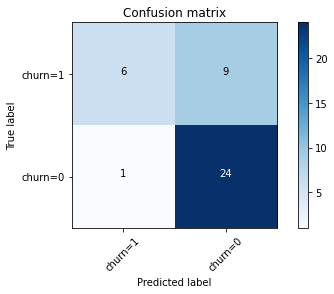

In [16]:
# Tính toán confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Hãy xem hàng đầu tiên. Hàng đầu tiên dành cho những khách hàng có giá trị churn thực tế trong test set là 1.
Như bạn có thể tính toán, trong số 40 khách hàng, giá trị churn của 15 khách hàng trong số đó là 1.
Và trong số 15 trường hợp này, bộ phân loại đã dự đoán chính xác 6 trong số đó là 1 và 9 trong số đó là 0.

Có nghĩa là, đối với 6 khách hàng, giá trị churn thực tế là 1 trong test set và bộ phân loại cũng dự đoán chính xác những giá trị đó là 1. Tuy nhiên, trong khi nhãn thực tế của 9 khách hàng là 1, bộ phân loại dự đoán những giá trị đó là 0, điều này không tốt lắm . Chúng ta có thể coi đó là lỗi của mô hình với hàng đầu tiên.

Còn những khách hàng có giá trị churn 0 thì sao? Hãy nhìn vào hàng thứ hai.
Có vẻ như có 25 khách hàng mà giá trị churn của họ là 0.

Bộ phân loại đã dự đoán chính xác 24 người trong số họ là 0 và sai một trong số đó là 1. Vậy, nó đã làm rất tốt trong việc dự đoán khách hàng có giá trị churn 0. Một ưu điểm về ma trận nhầm lẫn là nó cho thấy khả năng dự đoán chính xác của mô hình hoặc tách các lớp. Trong trường hợp cụ thể của bộ phân loại nhị phân, chẳng hạn như ví dụ này, chúng ta có thể diễn giải những con số này là số true positive, false positive, true negative và false negative.


In [17]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Dựa trên số lượng của từng phần, chúng ta có thể tính precision và recall của từng nhãn:

-   **Precision** là thước đo độ chính xác với điều kiện là nhãn lớp đã được dự đoán, được tính: precision = TP / (TP + FP)

-   **Recall** là tỷ lệ true positive, được tính: Recall =  TP / (TP + FN)

Vậy chúng ta có thể tính toán precision và recall của từng lớp.

**F1 score:**
Bây giờ chúng ta đang ở vị trí để tính F1 score cho mỗi nhãn dựa trên precision và recall của nhãn đó.

F1 score là điểm trung bình hài hòa của precision và recall, trong đó F1 score đạt giá trị tốt nhất ở 1 (precision và recall hoàn hảo) và thấp nhất là 0. Đó là một cách tốt để chứng tỏ rằng bộ phân loại có giá trị tốt cho cả recall và precision.

Và cuối cùng, chúng ta có thể cho biết độ chính xác trung bình cho bộ phân loại này là trung bình của F1 score cho cả hai nhãn, trong trường hợp này là 0,72.


### log loss

Bây giờ, hãy thử **log loss** để đánh giá. Trong hồi quy logistic, đầu ra có thể là xác suất khách hàng rời đi (hoặc bằng 1). Xác suất này là một giá trị từ 0 đến 1.
Log loss đo lường hiệu suất của bộ phân loại, trong đó đầu ra dự đoán là giá trị xác suất từ 0 đến 1.


In [18]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101186

<h2 id="practice">Thực hành</h2>
Cố gắng xây dựng lại mô hình hồi quy Logistic cho cùng một tập dữ liệu, nhưng lần này, hãy sử dụng các giá trị __solver__ và __regulification__ khác nhau? Giá trị __logLoss__ mới là gì?


In [19]:
# Nhập code của bạn ở đây
LR2 = LogisticRegression(C= 0.01,solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.61


In [20]:
LR3 = LogisticRegression(C= 0.01,solver='newton-cg').fit(X_train,y_train)
yhat_prob3 = LR3.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob3))

LogLoss: : 0.61


In [21]:
LR4 = LogisticRegression(C= 0.01,solver='lbfgs').fit(X_train,y_train)
yhat_prob4 = LR4.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob4))

LogLoss: : 0.61


<details><summary>Click vào đây để xem lời giải</summary>

```python
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

```

</details>


### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**